In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import random
import statistics
import math
from scipy.special import comb        # for computing the number of combinations
import numpy as np

# Random Networks

A random network consists of $N$ nodes where each node pair is connected with a given probability.

In general, networks can be directed, but here, we will consider undirected networks only. There are two definitions of random networks:

1. $G(N, p)$ is a network of $N$ nodes where each pair of nodes is connected (with an undirected edge) with probability $p$. 

2. $G(N, L)$ is a netwrok consisting of $N$ nodes and $L$ randomly placed edges. I.e., the probability that two nodes are connected is $$\frac{L}{\binom{N}{2}} = \frac{2L}{N(N-1)}$$.

In the $G(N, p)$ model, the probability of a connection between any two nodes is fixed, while in the $G(N,L)$ model, the number of edges is fixed. Of course, a random $G(N,p)$ network need not have the same number of edges as a random $G(N,L)$ network for $L = p\cdot\binom{N}{2}$.

## Section 1: Random Networks With Fixed Link Probability

Implement function `genRandNet(N,p)` generating a random undirected network corresponding to the model $G(N,p)$.

In [2]:
def genRandGNp(N,p):
    # generate random (undirected) network with N nodes 0,...,N-1 where p is 
    # the probability that a pair of nodes is connected    
    if p == 1:
        return nx.complete_graph(N)
    
    assert 0.0 <= p < 1.0
    
    G = nx.Graph()    
    G.add_nodes_from(range(N))
    for u in range(N):
        for v in range(u + 1, N):
            if random.random() < p:
                G.add_edge(u, v)
    
    return G

Generate 9 random $G(N,p)$ networks with $p=\frac{1}{8}$:

* 3 networks with $N=10$, 
* 3 networks with $N=12$, and 
* 3 networks with $N=20$.

For each of the generated networks:

1. Plot the network using circular layout - `nx.draw_circular()`.
2. Plot the histogram of the degree distribution. For each degree $d=0,1,\dots,N$ plot the number of nodes with degree $d$. 

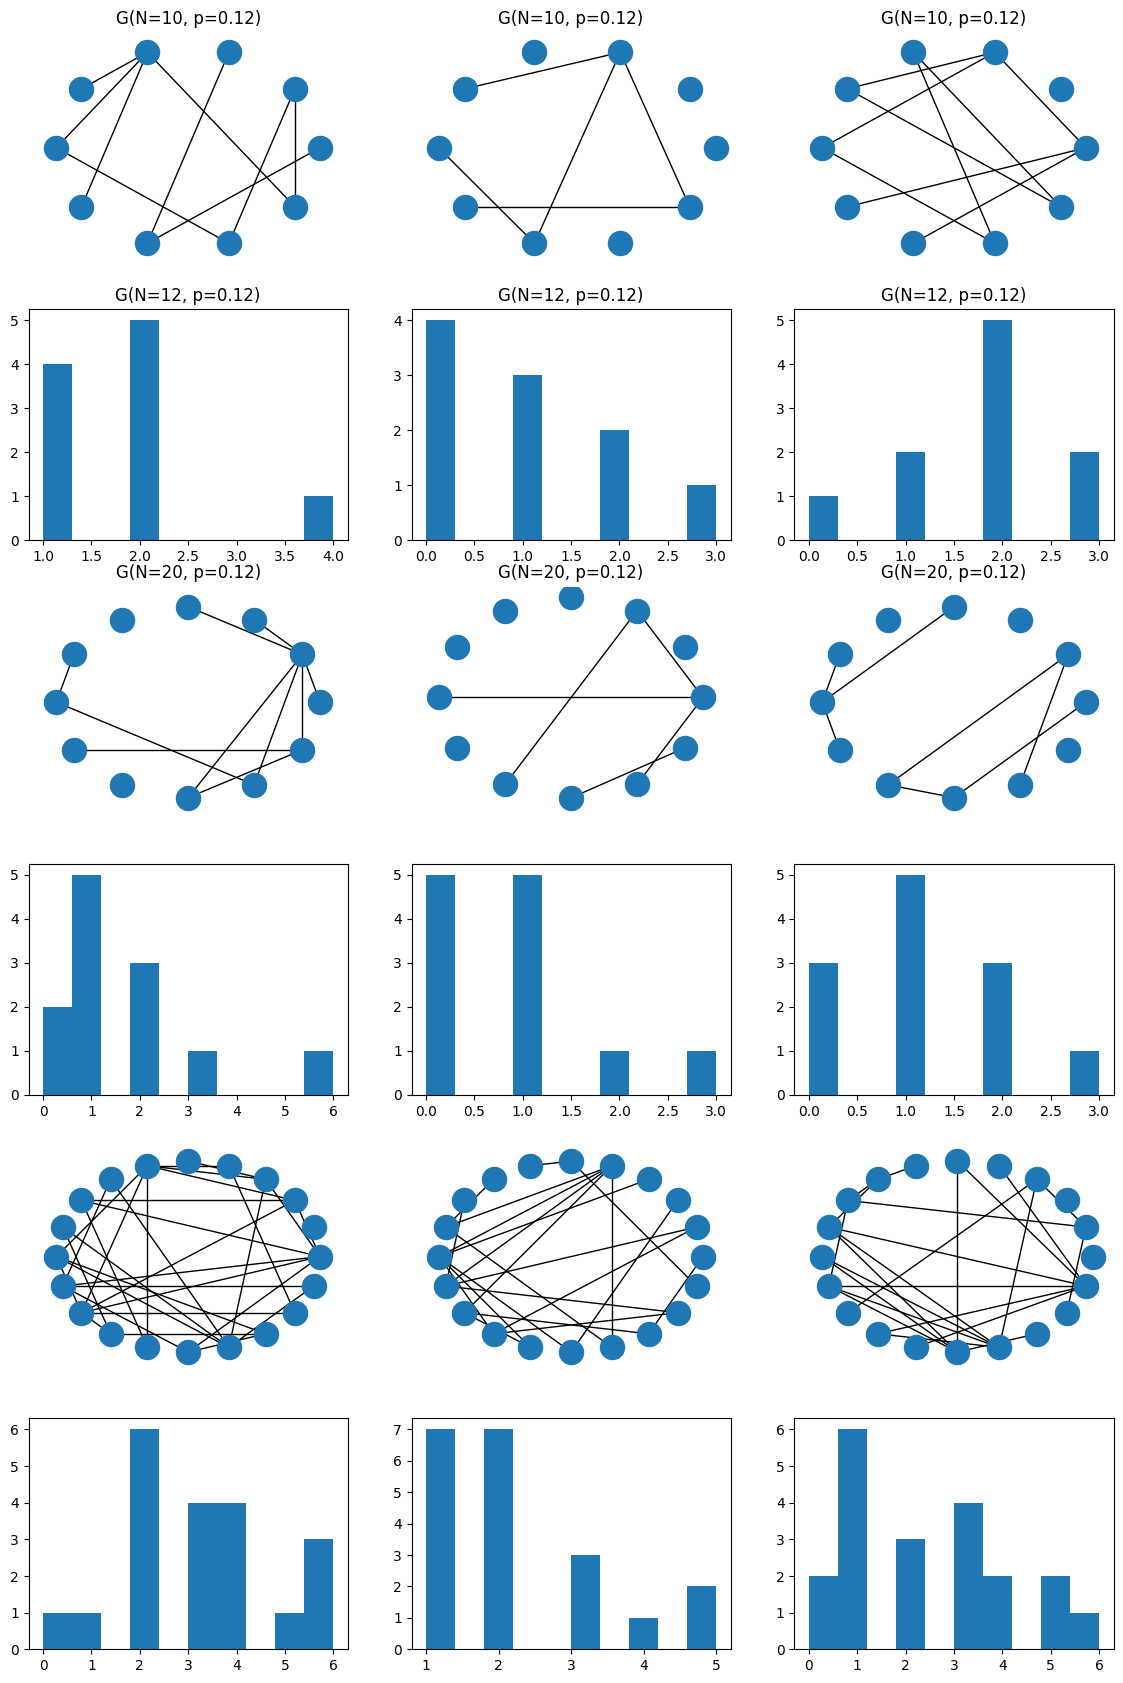

In [3]:
f, axs = plt.subplots(6,3,figsize=(14,21))
p = 1/8
for i,N in enumerate([10,12,20]):
    for j in range(3):
        # plot the network
        G = genRandGNp(N, p)      # generate a random network
        nx.draw_circular(G, ax=axs[2*i][j])
        axs[i][j].set_title("G(N={}, p={:4.2f})".format(N,p))
        # plot the histogram of its degree distribution
        degrees = [degree for node, degree in G.degree()]     # compute the list of degrees for all nodes in the network
        axs[2*i+1][j].hist(degrees)

Generate 3 random $G(N,p)$ networks with $N=100$ and $p=0.03$. Draw the generated networks, this time using `nx.draw_spring()`. In the title of each plot give the number of isolated nodes in the network.

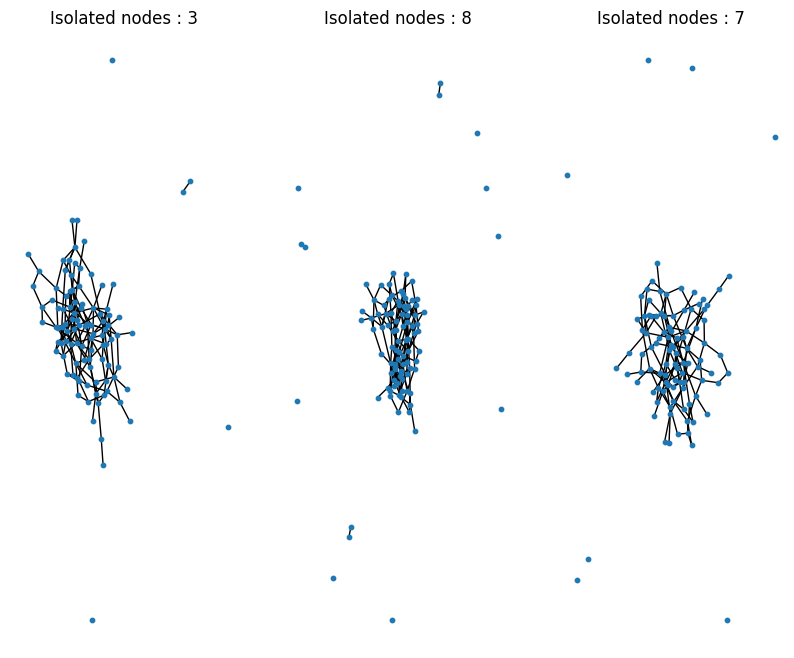

In [4]:
N = 100
p = 0.03
f, axs = plt.subplots(1,3,figsize=(10,8))
for i in range(3):
    G = genRandGNp(N, p)      # generate a random network
    nx.draw_spring(G, ax=axs[i], node_size = 10)
    isolated_nodes = nx.number_of_isolates(G)
    axs[i].set_title("Isolated nodes : {}".format(isolated_nodes))
    # plot the histogram of its degree distribution

    

The functions `gnp_random_graph(n, p, seed=None, directed=False)` and `fast_gnp_random_graph(n, p, seed=None, directed=False)` in NetworkX generate random $G(N,p)$ networks for `n`$=N$ and `p`$=p$. Empirically (for a suitable values for `n` and `p`) compare the time complexity of the functions `genRandGNp()`, `gnp_random_graph()` and `fast_gnp_random_graph()`.

In [5]:
import time

N = 3000
p = 0.03
r = 3
res = []
for method in [genRandGNp, nx.gnp_random_graph, nx.fast_gnp_random_graph]:
    elapsed = 0.0
    for c in range(r):
        start = time.time()
        G = method(N,p)
        elapsed += time.time() - start
    res.append((method.__name__,elapsed/r))
    
res.sort(key=lambda x: x[1])
for i, t in enumerate(res,1):
    print("{}. {:20s} \t {} seconds".format(i,t[0],t[1]))

1. fast_gnp_random_graph 	 0.35034823417663574 seconds
2. genRandGNp           	 0.7048619588216146 seconds
3. gnp_random_graph     	 1.0107033252716064 seconds


Derive a formula to compute the probability $p_k$ that a node in a random $G(N,p)$ network has degree $k$. Implement it as the following function.

In [6]:
def degProbGNp(k,N,p):
    return comb(N-1,k) * p**k * (1-p)**(N-1-k)

Plot the probabilistic distribution of the degrees in random $G(N,p)$ networks.

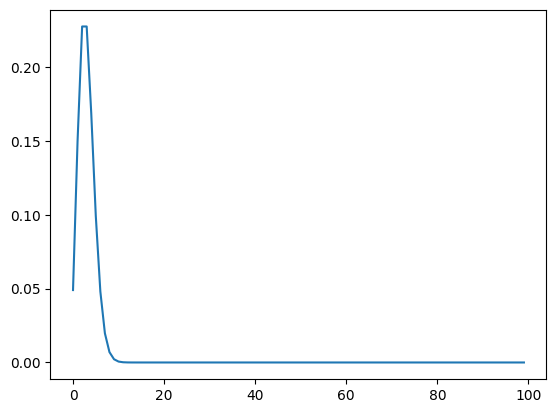

In [7]:
def probabilistic_distribution(N,p):
    k = np.arange(N)
    prob = []
    for i in k:
        prob.append(degProbGNp(i, N, p))
    plt.figsize=(10,8)
    plt.plot(k, prob)

probabilistic_distribution(100, 0.03)
    


Compute empirically the degree distribution in random $G(N,p)$ networks.

Sum of expected: 11.000000000000004


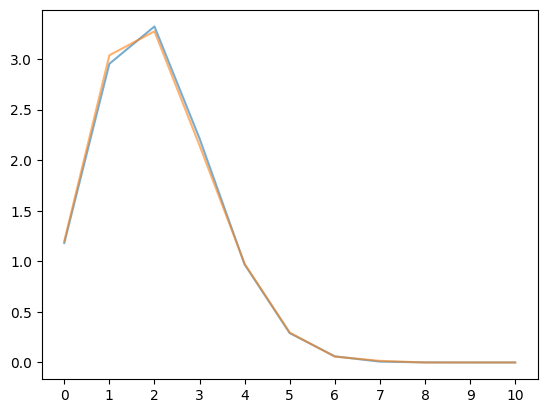

In [8]:
def testDegDistrGNp(N,p,r):
    # test the degree distribution in random networks
    # N is the number of nodes and p is is the probability that a given
    # pair of nodes is connected by an edge, r is the number of repetitions
    # used to generate networks and to measure their degree distribution
    # plot 
    #   * the theoretical degree distribution and 
    #   * the average degree distribution 
    #     obtained by averaging the number of nodes of degree d from r randomly
    #     generated networks
    k = np.arange(0,N)
    expected = [degProbGNp(n,N,p) * N for n in k]
    print("Sum of expected:",sum(expected))
    plt.xticks(k)
    plt.plot(k,expected,alpha=0.6)
    computed = np.zeros(N)
    for i in range(r):
        G = nx.fast_gnp_random_graph(N,p)
        degrees = [degree for node, degree in G.degree()]
        for d in degrees:
            computed[d] += 1
    computed = computed / r
    plt.plot(k,computed,alpha=0.6)


testDegDistrGNp(11, 0.2, 1000)


        

## Section 2: Random Networks With a Fixed Number of Links

Implement function `genRandGNL(N,L)` generating a random undirected network corresponding to the model $G(N,L)$.

In [9]:
def genRandGNL(N,L):
    # generate random (undirected) network with N nodes 0,...,N-1 where L is 
    # the number of edges in the network
    assert 0 <= L <= N*(N-1)/2
    
    if L == N*(N-1)/2:
        return nx.complete_graph(N)
    
    G = nx.Graph()    
    G.add_nodes_from(range(N))
    for u in range(N):
        for v in range(u + 1, N):
            if random.random() < L/(N*(N-1)/2):
                G.add_edge(u, v)
    
    return G

Generate 9 random $G(N,L)$ networks with $L=20$:

* 3 networks with $N=10$, 
* 3 networks with $N=12$, and 
* 3 networks with $N=20$.

For each of the generated networks:

1. Plot the network using circular layout - `nx.draw_circular`.
2. Plot the histogram of the degree distribution. For each degree $d=0,1,\dots,N$ plot the number of nodes with degree $d$. 

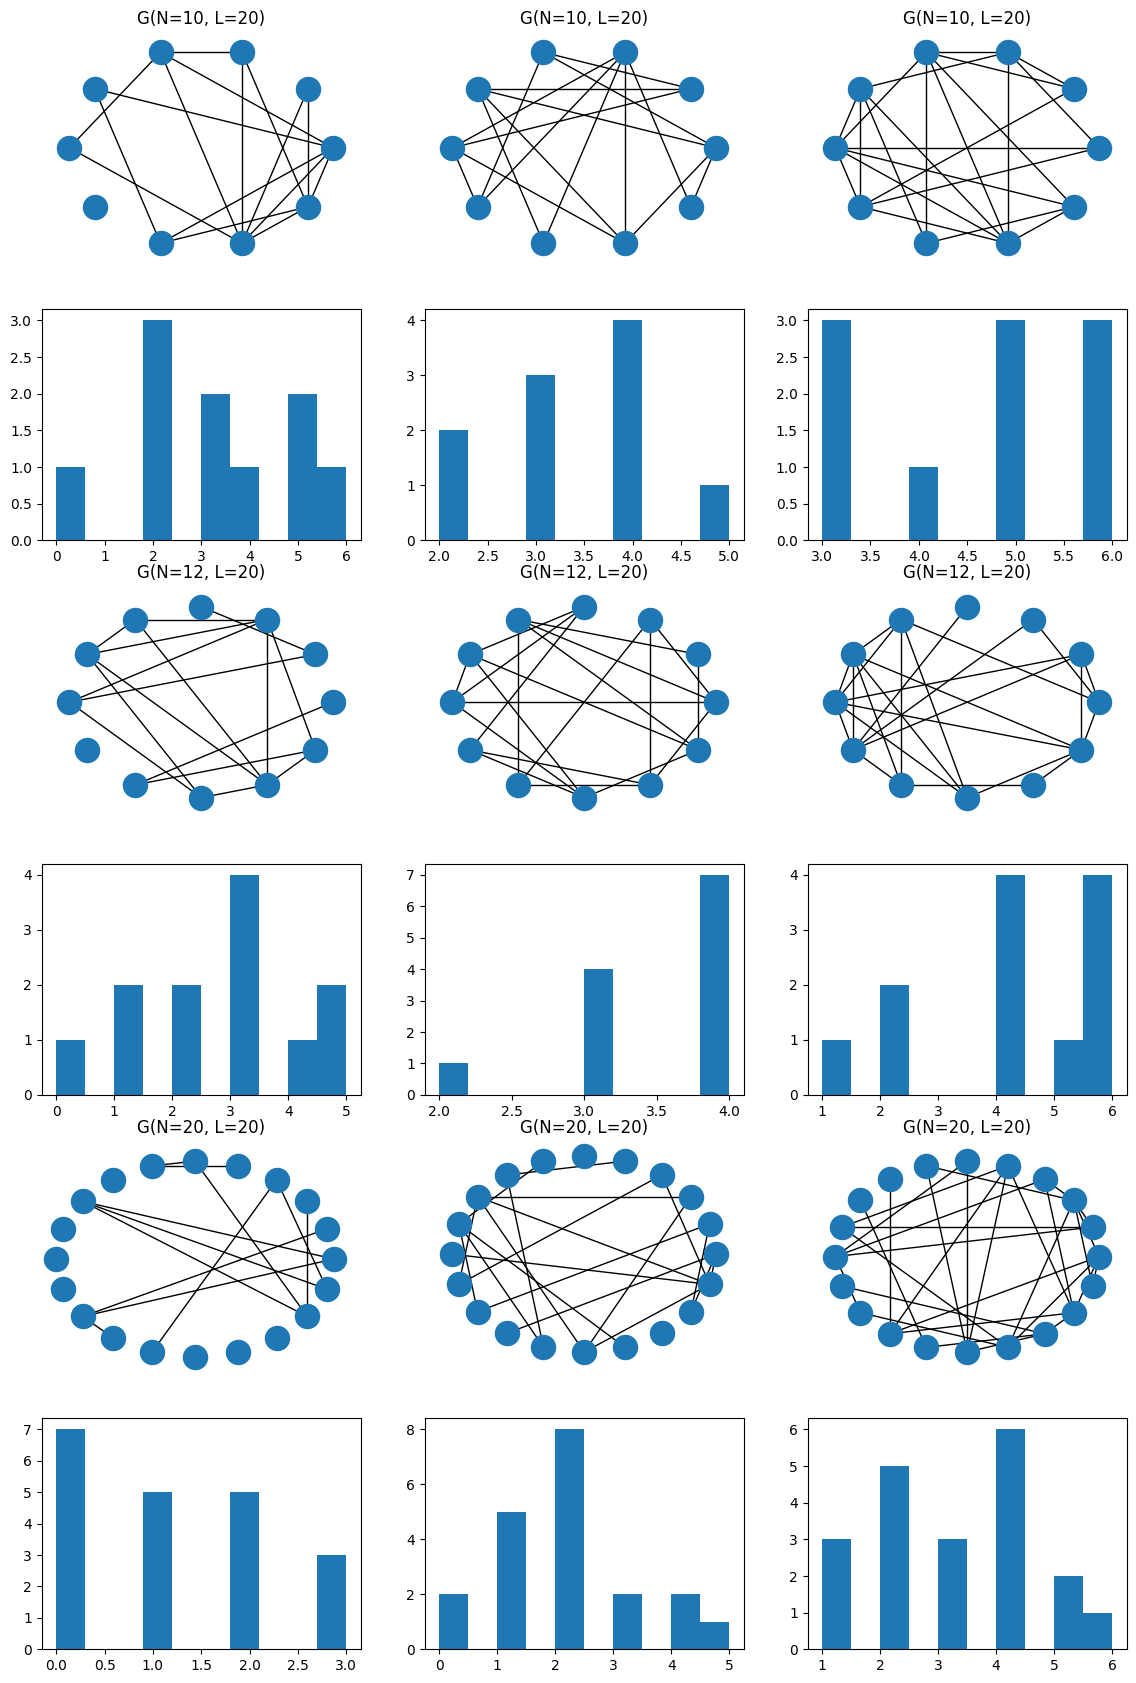

In [10]:
f,axs = plt.subplots(6,3,figsize=(14,21))
L = 20
for i,N in enumerate([10,12,20]):
    for j in range(3):
        # plot the network
        G = genRandGNL(N, L)      # generate a random network
        nx.draw_circular(G, ax=axs[2*i][j])
        axs[2*i][j].set_title("G(N={}, L={})".format(N,L))
        # plot the histogram of its degree distribution
        degrees = [degree for node, degree in G.degree()]     # compute the list of degrees for all nodes in the network
        axs[2*i+1][j].hist(degrees)

Generate 3 random $G(N,L)$ networks with $N=100$ and $L=150$. The value $L=150$ corresponds to the probability of an edge approximately 0.03. Draw the generated networks, this time using `nx.draw_spring()`. In the title of each plot give the number of isolated nodes in the network.

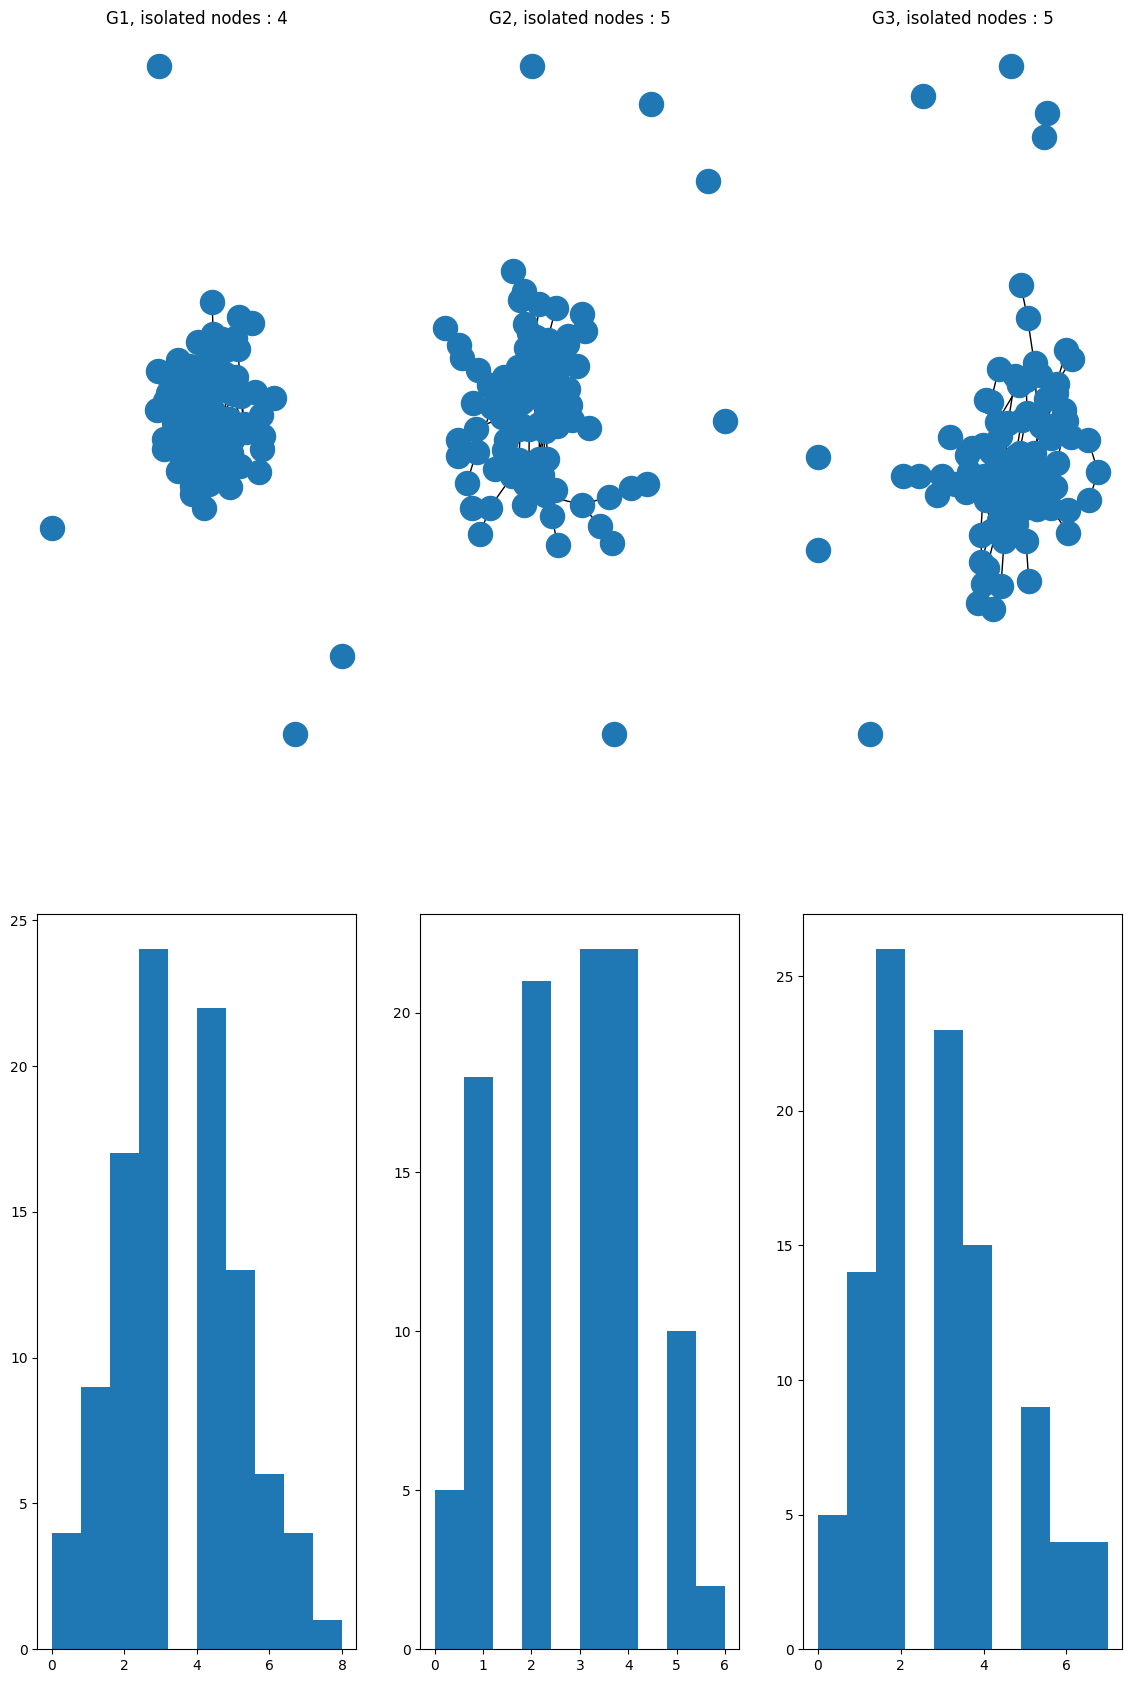

In [16]:
f,axs = plt.subplots(2,3,figsize=(14,21))
N = 100
L = 150
for i in range(3):
    # plot the network
    G = genRandGNL(N, L)      # generate a random network
    nx.draw_spring(G, ax=axs[0][i])
    axs[0][i].set_title("G{}, isolated nodes : {}".format(i+1, nx.isolate.number_of_isolates(G)))
    # plot the histogram of its degree distribution
    degrees = [degree for node, degree in G.degree()]     # compute the list of degrees for all nodes in the network
    axs[1][i].hist(degrees)
    

The following excercises correspond to random $G(N,p)$ networks but this time with random $G(N,L)$ networks. 

In [17]:
def degProbGNL(k,N,L):
    # compute probability that a node in a random G(N,L) network
    # has exactly k links
    # YOUR CODE HERE
    p = L / (math.comb(N, 2))
    
    # Calculate the binomial coefficient
    binomial_coefficient = math.comb(N-1, k)
    
    # Calculate the probability mass function
    prob = binomial_coefficient * (p**k) * ((1-p)**(N-1-k))
    
    return prob

Number of edges: 38
Sum of the probabilities: 1.000000000000001
Sum of the probabilities: 1.000000000000001


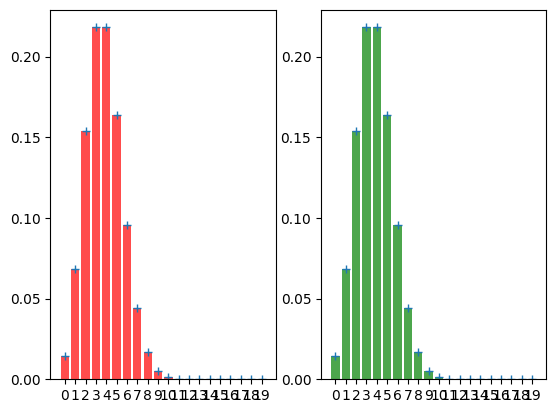

In [18]:
N = 20
p = 0.2
L = round(p * comb(N,2))
print("Number of edges:",L)
k = range(0,N)
prob = [degProbGNL(n,N,L) for n in k]
ax1 = plt.subplot(121)
plt.plot(k,prob,'+')
plt.xticks(k)
plt.bar(k,prob,alpha=0.7,color='r')
print("Sum of the probabilities:",sum(prob))

prob = [degProbGNp(n,N,p) for n in k]
plt.subplot(122, sharey = ax1)
plt.plot(k,prob,'+')
plt.xticks(k)
plt.bar(k,prob,alpha=0.7,color = 'g')
print("Sum of the probabilities:",sum(prob))

In [ ]:
def testDegDistrGNL(N,L,r):
    # test the degree distribution in random networks
    # N is the number of nodes and L is the nuber of links in the network, 
    # r is the number of repetitions used to generate networks and 
    # to measure their degree distribution
    # plot 
    #   * the theoretical degree distribution and 
    #   * the average degree distribution 
    #     obtained by averaging the number of nodes of degree d from r randomly
    #     generated networks
    # YOUR CODE HERE
    raise NotImplementedError()
    
N = 20
p = 0.8
L = round(p*comb(N,2))
print("L:",L)
testDegDistrGNL(N, L, 1000)

The following cell contains another implementation of function `degProbGNL` called `degProbGNL_1` that is more sutable for big networks.

In [ ]:
def logFactorial(N):
    r = 0
    for i in range(2,N+1):
        r += math.log(i)
    return r

def logComb(N,k):
    #a = logFactorial(N) - logFactorial(k) - logFactorial(N-k)
    a = 0
    for i in range(1,k+1):
        a += math.log((N-i+1)/i)
    return a

def degProbGNL_1(k,N,L):
    N2 = round(comb(N,2))
    return math.exp(logComb(N-1,k) + logComb(N2-N+1,L-k) - logComb(N2,L))

# Are Real-World Networks Random?


Let us compare degree distribution in random networks and real-world networks. Implement the following function that compares degree distribution of given network $G$ with the expected theoretical degree distribution of a random network with the same number of nodes and the same probability of link between the nodes as in $G$.

In [ ]:
def compareDegreeDistr(G):
    # using a logarithmic scale, plot the degree distribution of the network G 
    # and the expected degree distribution in G(N,L) and G(N,p) random networks, where 
    # N is the number of nodes in G, L is the number of edges in G
    # and p is the number of edges in G divided by comb(N,2)
    N = len(G.nodes())
    L = len(G.edges())
    print("The graph has {} nodes, {} edges".format(len(G.nodes()),len(G.edges())))
    expected_deg = N * L/ comb(N,2)
    print("Expected degree",expected_deg)
    k = np.arange(0,N)
    expectedGNL = []
    for n in k:
        if (n > 3 * expected_deg) and N * expectedGNL[-1] < 0.1:
            expectedGNL.append(0)
        else:
            expectedGNL.append(degProbGNL_1(n,N,L) * N)
    p = L / comb(N,2)
    expected_GNp = [degProbGNp(n,N,p) * N for n in k]
    fig, ax = plt.subplots()
    ax.set_xscale("log")
    #ax.set_yscale("log")
    dgs = G.degree()
    max_deg = sorted(dgs,key = lambda x: x[1])[-1][1]
    ax.set_xlim(1,max_deg*2)     # the upper limit is two times the maximum degree 
    # as it will be only slightly more than necessary, as the scale will be logarithmic
    # ax.set_ylim(1e-2,L)
    plt.xlabel("Degree")
    plt.ylabel("Count")
    ax.plot(k,expectedGNL,'+-r')
    plt.plot(k,expected_GNp,'bx')
    degrees = [d for n,d in G.degree() ]
    degrees_hist,bins = np.histogram(degrees, bins=np.arange(N+1)-0.5)
    # print(degrees_hist,bins)
    # print(degrees_hist/r)
    ax.plot(k,degrees_hist,'og')
    ## print("Sum of average degrees count:",np.sum(degrees_hist))


Sample networks can be found on the web page http://networksciencebook.com/translations/en/resources/data.html.

In [ ]:
# Let us use the network of routers.
G = nx.read_edgelist("./internet.edgelist.txt")
compareDegreeDistr(G)

The graph has 192244 nodes, 609066 edges
Expected degree 6.336417971005446


NameError: name 'degProbGNL_1' is not defined

In [ ]:
print(G.size())

In [ ]:
print(len(G))

In [ ]:
# Let us use the network of science collaboration.
G = nx.read_edgelist("./collaboration.edgelist.txt")
compareDegreeDistr(G)

In [ ]:
# Let us use the network of protein iteractions.
G = nx.read_edgelist("./protein.edgelist.txt")
print(len(G.nodes()),"nodes")
print(len(G.edges()),"edges")
print("Maximal possible number of edges",comb(len(G.nodes()),2))
compareDegreeDistr(G)

In [ ]:
# Let us use the network of protein iteractions.
G = nx.read_edgelist("./email.edgelist.txt")
print(len(G.nodes()),"nodes")
print(len(G.edges()),"edges")
print("Maximal possible number of edges",comb(len(G.nodes()),2))
compareDegreeDistr(G)

For big networks we cannot use the function `comb(N,k)` to compute the number of combinations, as the results will be too big values of type `double` and the result will be undefined. We cannot compute the number of combinations using our own code neither, as it can require long running time and can still loose accuracy. Computing the logarithm of the number of combinations with the function `logComb()` does not help, as the function `degProbGNL(k,N,L)` will be called $O(N)$ times and one such call can require 
$$O(L)$$ time. This can be too long for big $N$ and $L$. The workaround is to use the function `logComb(k,N,L)`, but do not call it when the expected degree is much smaller than 1.

Another possibility to avoid long computing time for computing the number of combinations is to use the well known Stirling's formula approximating factorial
$$n! \approx \sqrt{2 \pi n} \cdot \left(\frac{n}{e}\right)^n .$$ This can be even used together with the approximation of the binomial distribution by Poisson distribution that can be done if the expected degree for the nodes in a network is much smaller than $N$.

From the above plots, we can easily infer that real-world networks are not random. We can mathematically support what we see in the above plots. While the degree of a node in a random network with $N$ nodes can be an arbitrary integer between 0 and $N-1$, the above plots indicate that high-degree nodes are extremely nonprobable in random networks but common in real-world networks.

Let us assume that some real-world social network can be modeled as a random network with mean degree $\overline{k}$. According to some sociologic studies, a typical person knows about 1,000 persons on a first-name basis. Let us assume $\overline{k} = 1000$. Let us approximate the current world population as $N = 10^9$. Let $k_{\max}$ denote such degree that in a random network with $N$ nodes, there is at most one node with a degree higher than $k_{\max}$. Similarly, let $k_{\min}$ denote such degree that in a random network with $N$ nodes, there is at most one node with a degree lower than $k_{\min}$. In the book "[Network Science](http://www.networksciencebook.com/)" by Albert László Barabási, it is shown how to compute $k_{\min}$ and $k_{\max}$. The prediction is $k_{\min} = 816$ and $k_{\max} = 1185$. Hence, the random network lacks extremely popular individuals with degrees greater than $k_{\max}$. On the contrary, there were people with a much higher number of known persons. E.g., one Facebook user has 5000 friends (the maximum allowed number).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96951912-af33-4716-93cf-0ecb946eb990' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>